In [1]:
from Game import *

Version:  0.2.36


In [2]:
def initial_state():
    state=Board(3,3)
    
    # state[0]=1 in cases where we need to have starting pieces
    return state

In [3]:
def valid_moves(state,player):
    
    moves=[]
    for location in range(9):
        if state[location]==0:
            moves.append(location)
    
    
    return moves

In [4]:
def update_state(state,player,move):
    
    new_state=state
    
    new_state[move]=player
    
    return new_state

In [5]:
def three_in_a_row(a,b,c,player):
    
    if a==player and b==player and c==player:
        return True
    else:
        return False
    
    
    
def win_status(state,player):
    
    # 0 1 2
    # 3 4 5
    # 6 7 8
    
    if player==1:
        other_player=2
    else:
        other_player=1
    
    if three_in_a_row(state[0],state[1],state[2],player):
        return 'win'
    if three_in_a_row(state[3],state[4],state[5],player):
        return 'win'
    if three_in_a_row(state[6],state[7],state[8],player):
        return 'win'
    if three_in_a_row(state[0],state[3],state[6],player):
        return 'win'
    if three_in_a_row(state[1],state[4],state[7],player):
        return 'win'
    if three_in_a_row(state[2],state[5],state[8],player):
        return 'win'
    if three_in_a_row(state[0],state[4],state[8],player):
        return 'win'
    if three_in_a_row(state[2],state[4],state[6],player):
        return 'win'
    
    if not valid_moves(state,other_player):
        return 'stalemate'
    
    
def show_state(state):
    print(state)
    


In [6]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)
 
random_agent=Agent(random_move)    

In [7]:
def human_move(state,player):    
    print("""
    0 1 2
    3 4 5
    6 7 8
    """)
    move=int(input("What location do you want to move?"))
    return move
 
human_agent=Agent(human_move)    

In [8]:
from Game.minimax import *
def minimax_move(state,player):
    values,moves=minimax_values(state,player,maxdepth=20,display=False)
    return top_choice(moves,values)
    
def heuristic(state,player):
    # returns between -1 and 1 (not inclusive)
    # approximate value of a state
    # positive = good for the player
    # negative = bad for player
    
    return 0

# material advantage
def heuristic(state,player):
    # returns between -1 and 1 (not inclusive)
    # approximate value of a state
    # positive = good for the player
    # negative = bad for player
    
    # count up my pieces, count up their pieces
    N_player=count_pieces(state,player)
    N_other=count_pieces(state,other_player)
    
    return (N_player-N_other)/(N_player+N_other)
    
    
    
    return 0




minimax_agent=Agent(minimax_move)

In [9]:
def skittles_move(state,player,info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    
    
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=3  # number of skittles
        
    
    move=weighted_choice(T[state])
    
    if move is None:  # can't win from this state
        if not last_state is None:
            T[last_state][last_action]-=1   # take away a skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0
    
        move=random_move(state,player)
    
    return move

def skittles_after(status,player,info):  # this is called after the game is over
    T=info.T
    last_state=info.last_state
    last_action=info.last_action

    if status=='lose':
        T[last_state][last_action]-=1   # take away a skittle
        if T[last_state][last_action]<0:
            T[last_state][last_action]=0
    
    

In [10]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.T=Table()
skittles_agent1.post=skittles_after

skittles_agent2=Agent(skittles_move)
skittles_agent2.T=Table()
skittles_agent2.post=skittles_after

In [11]:
g=Game()
g.run(skittles_agent1,random_agent)

====
Game  1
 0  0  0 
 0  0  0 
 0  0  0 

Player 1 moves 1
 0  1  0 
 0  0  0 
 0  0  0 

Player 2 moves 6
 0  1  0 
 0  0  0 
 2  0  0 

Player 1 moves 5
 0  1  0 
 0  0  1 
 2  0  0 

Player 2 moves 8
 0  1  0 
 0  0  1 
 2  0  2 

Player 1 moves 3
 0  1  0 
 1  0  1 
 2  0  2 

Player 2 moves 7
 0  1  0 
 1  0  1 
 2  2  2 

Player  2 won.


[2]

## Progress

In [12]:
skittles_agent1.T=Table()

In [13]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title
from tqdm.notebook import tqdm

In [14]:
S=Storage()
one,two,ties,N=0,0,0,0

In [15]:
for i in tqdm(range(500)):
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(skittles_agent1,random_agent)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
y1,y2,y0,x=S.arrays()

In [19]:
from bigfonts import *

Text(0, 0.5, 'Percent')

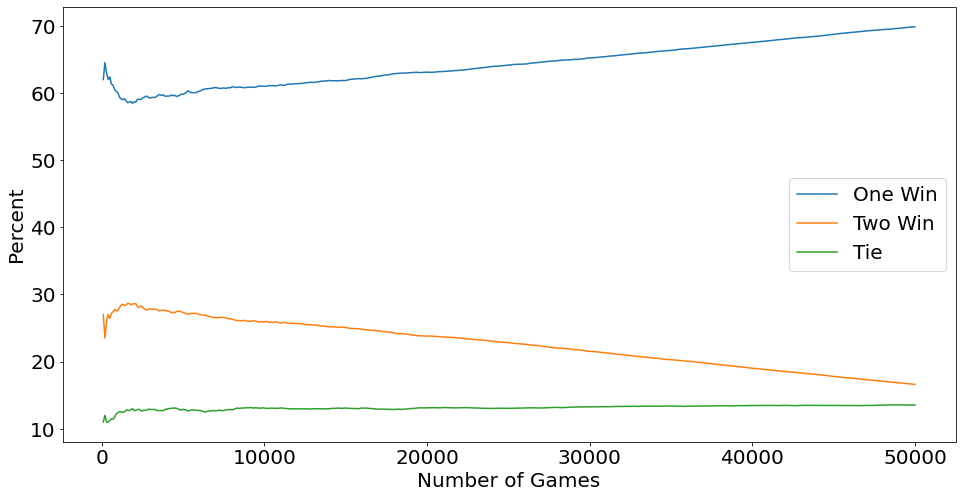

In [20]:
figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')